# Read image.

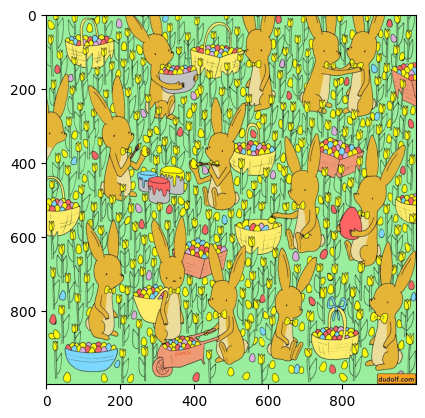

In [305]:
# Import libraries.
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image.
img = cv2.imread('rabbit.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

# Preprocessing pipeline.

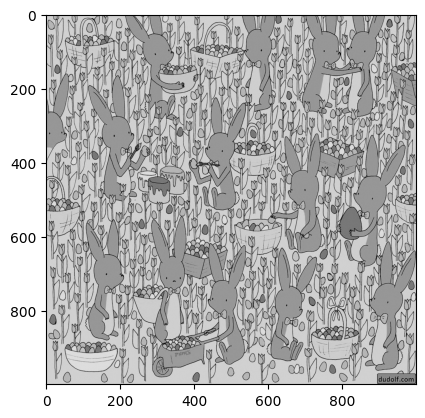

In [306]:
# Convert to grayscale.
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

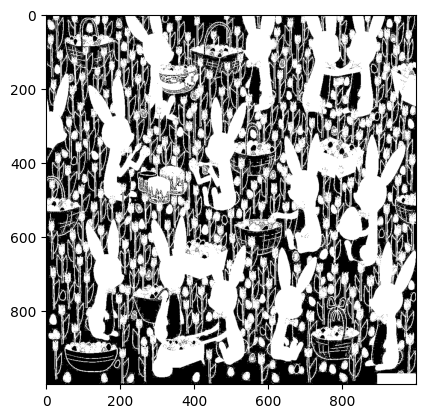

In [307]:
# Thresholding to create binary image, highlight rabbits.
_, thresh = cv2.threshold(gray, 195, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh, cmap='gray')
plt.show()

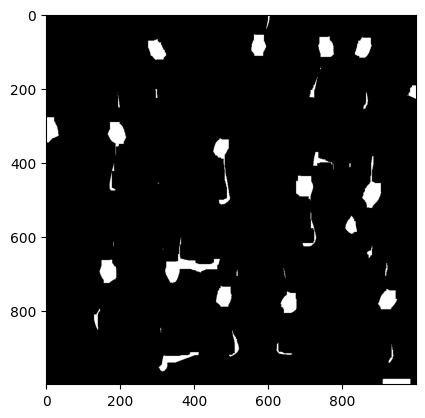

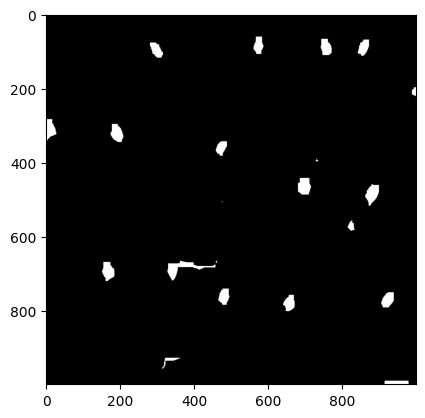

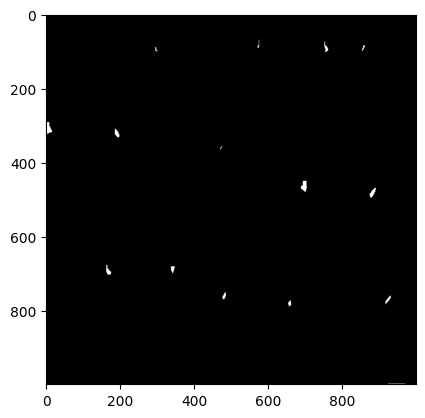

In [308]:
# Erode big regions
# including rabbit body and flowers.
kernel_big = np.ones((30, 30), np.uint8)
erode_body = cv2.erode(thresh, kernel_big, iterations=1)
plt.imshow(erode_body, cmap='gray')
plt.show()

# Erode remaining noises.
kernel_medium = np.ones((11, 11), np.uint8)
erode_noise = cv2.erode(erode_body, kernel_medium, iterations=1)
plt.imshow(erode_noise, cmap='gray')
plt.show()

# Erode remaining noises.
kernel_small = np.ones((5, 5), np.uint8)
erode_dots = cv2.erode(erode_noise, kernel_small, iterations=4)
plt.imshow(erode_dots, cmap='gray')
plt.show()

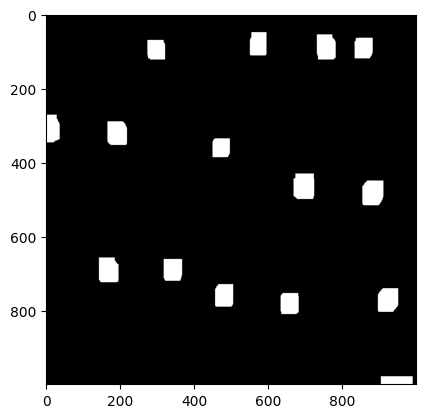

In [309]:
# Dilate remaining features.
finish = cv2.dilate(erode_dots, kernel_medium, iterations=4)
plt.imshow(finish, cmap='gray')
plt.show()

# Template matching.

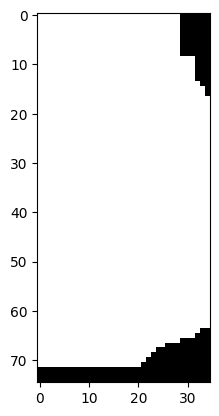

(1000, 1000)
(75, 35)


In [310]:
# Extract template - left cropped rabbit.
template = finish[275:350, 0:35]
plt.imshow(template, cmap='gray')
plt.show()
print(finish.shape)
print(template.shape)

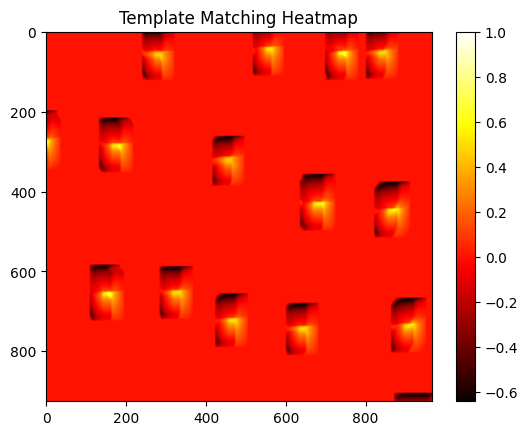

In [311]:
# Template matching
result = cv2.matchTemplate(finish, template, cv2.TM_CCOEFF_NORMED)
plt.imshow(result, cmap='hot')
plt.colorbar() # Shows the scale
plt.title('Template Matching Heatmap')
plt.show()

# Create bounding boxes and print result.

Detected rabbits: 14


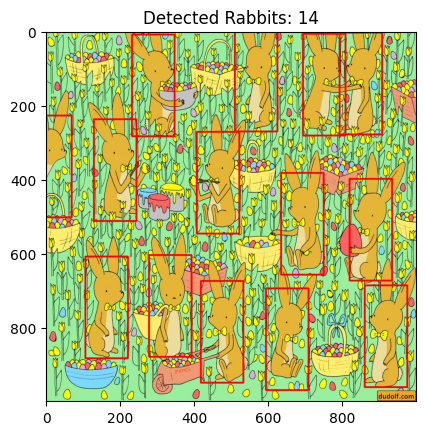

In [312]:
threshold = 0.45    # 0.1 to 0.45
locations = np.where(result >= threshold)

rectangles = []
w, h = template.shape[::-1]

# Create rectangles for each detected area.
for pt in zip(*locations[::-1]):
    rect = [int(pt[0]), int(pt[1]), int(w), int(h)]
    rectangles.append(rect)
    rectangles.append(rect)  # Add twice for groupRectangles().

# Group overlapping rectangles (Non-Maximum Suppression).
rectangles, weights = cv2.groupRectangles(rectangles, groupThreshold=7, eps=0.1)

# Draw boxes and count.
for (x, y, w, h) in rectangles:
    cv2.rectangle(img, (x - 50, y - 50), (x + w + 30, y + h + 150), (255, 0, 0), 4) # (-50,-50,+30,+150): Alignment for visually accurate boxes.
count = len(rectangles)
print(f"Detected rabbits: {count}")


plt.imshow(img)
plt.title(f'Detected Rabbits: {count}')
plt.show()